Text(0, 0.5, 'R ($\\Omega$)')

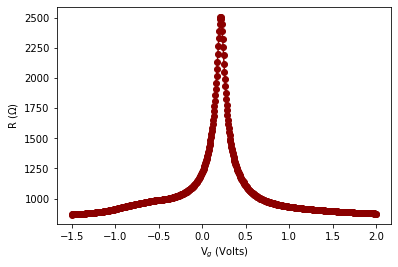

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#load the data
data=np.loadtxt('data_graphene.txt')
# extract the gate voltage and the resistance
x=data[:,0]
y=data[:,1]
#plot the experimental data
plt.plot(x,y,'-o', color='darkred')
plt.xlabel(r'V$_{g}$ (Volts)')
plt.ylabel('R ($\Omega$)')

In [11]:
from lmfit import Parameters, Minimizer
from scipy import constants
from matplotlib import rcParams

def mob(params, x, data=None):
    rc=params['rc']
    mu=params['mu']
    n0=params['n0']
    epr=params['epr']
    d=params['d']
    L=params['L']
    W=params['W']
    Vd=params['Vd']
    
    C=constants.epsilon_0*epr/d
    n=C*(x-Vd)/constants.e
    model=rc+L/(W*mu*constants.e*np.sqrt((n0*1e16)**2+n**2))
    if data is None:
        return model
    else:
        return model-data

In [14]:
pars=Parameters()
# set up the initial parameter values
pars.add('rc', value=500)
pars.add('n0', value=0.05)
pars.add('mu',value=5, min=0)
pars.add('Vd', value=0.1)
pars.add('epr', value=3.9, vary=False)
pars.add('d', value=25e-9, vary=False)
pars.add('L',value=5e-6, vary=False)
pars.add('W', value=2e-6, vary=False)


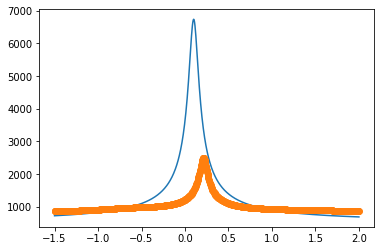

In [16]:
#plot the initial guess
plt.plot(x,mob(pars,x))
plt.plot(x,y,'o')

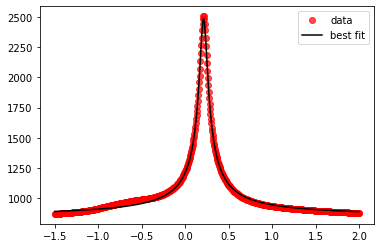

In [19]:
fitter=Minimizer(mob,pars,fcn_args=(x,y))
result=fitter.minimize()
final=y+result.residual
plt.plot(x,y,'o', color='red', label='data', alpha=0.7)
plt.plot(x,final, color='black', label='best fit')
plt.legend()

In [20]:
result.params['mu']

<Parameter 'mu', value=22.679737312781885 +/- 0.104, bounds=[0:inf]>

In [21]:
result

In [22]:
# get the R^2 value
r_squared=1-(result.residual.var()/np.var(y))
print('R^2:', r_squared)

R^2: 0.9965645073417836
